In [2]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.selection.rnd import RandomSelection
from task_offloading_moo.pymoo.problem import TaskOffloadingProblem
from task_offloading_moo.pymoo.operators.repair import TaskOffloadingRepair
from task_offloading_moo.pymoo.operators.sampling import TaskOffloadingSampling
from pymoo.operators.crossover.pntx import SinglePointCrossover

from pymoo.optimize import minimize
from pymoo.operators.mutation.pm import PolynomialMutation

from pymoo.visualization.scatter import Scatter

from pymoo.util.archive import default_archive

In [3]:
pop_size = 100
n_gen = 50
mutation_rate = 0.1
crossover_rate = 0.5

num_cloud_machines = 30
num_fog_machines = 20
num_tasks = 500

In [4]:
problem = TaskOffloadingProblem(num_cloud_machines, num_fog_machines, num_tasks)

algorithm = NSGA2(repair=TaskOffloadingRepair(),
               pop_size=pop_size,
               eliminate_duplicates=True,
               sampling=TaskOffloadingSampling(),
               selection=RandomSelection(),
               crossover=SinglePointCrossover(prob=crossover_rate, repair=TaskOffloadingRepair()),
               mutation=PolynomialMutation(prob=mutation_rate, repair=TaskOffloadingRepair()),
               archive=default_archive(problem)
               )

In [5]:
# problem.dataset_generator.get_machines()

In [6]:
res = minimize(problem,
           algorithm,
           ('n_gen', n_gen),
           seed=1,
           verbose=True)

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |      5 |             - |             -
     2 |      200 |      6 |  0.1414432638 |         ideal
     3 |      300 |      6 |  0.0185404898 |             f
     4 |      400 |      7 |  0.0449903646 |             f
     5 |      500 |      8 |  0.0117788750 |             f
     6 |      600 |      9 |  0.0266122852 |             f
     7 |      700 |      9 |  0.000000E+00 |             f
     8 |      800 |      9 |  0.0132017344 |             f
     9 |      900 |     10 |  0.0117595649 |             f
    10 |     1000 |      9 |  0.0235985336 |             f
    11 |     1100 |     10 |  0.0291105104 |         ideal
    12 |     1200 |      9 |  0.0286789432 |             f
    13 |     1300 |     10 |  0.0015598154 |             f
    14 |     1400 |     10 |  0.0015598154 |             f
    15 |     1500 |      9 |  0.0144062828 |             f
    16 |     1600 |      6 |  0.0193027542 |         ide

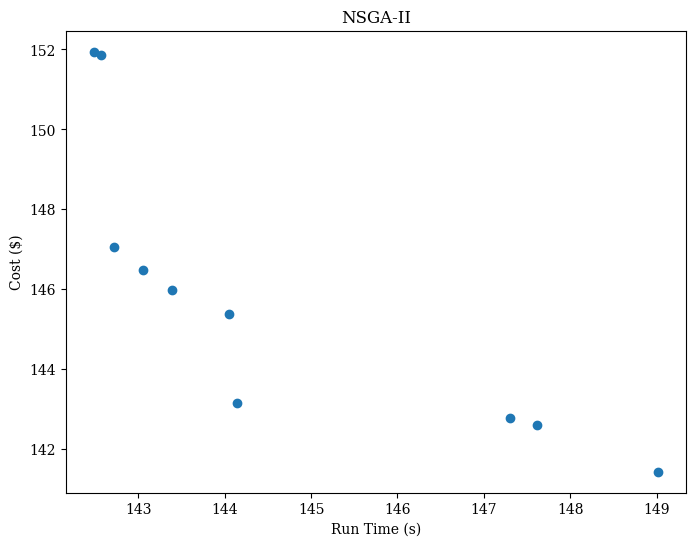

In [7]:
# print(f"Best population found:\n {res.X} \nwith F:\n{res.F}")

plot = Scatter(title="NSGA-II")
plot.add(res.F)
plot.axis_labels = problem.dataset_generator.get_objective_names()
_ = plot.show()

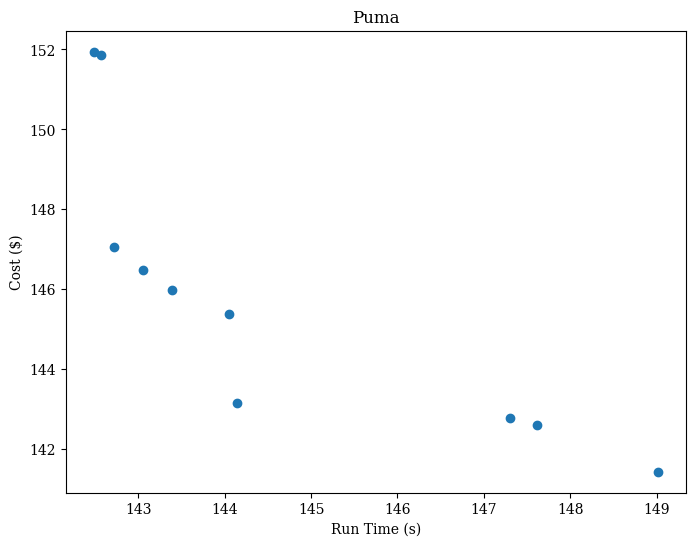

In [8]:
plot = Scatter(title="Puma")
plot.add(res.archive.get("F"))
plot.axis_labels = problem.dataset_generator.get_objective_names()
_ = plot.show()